# Capstone Project

<hr>

## Goal of Project
- Overall implementation of what I have learned so far...
- To reinforce learning

## Step 1: Acquire Data
- Explore problem
- Identify data
- Import data

### Step 1a: Define Problem
- Don't be too ambitious trying to define a problem
    - **Examples:**
        - A green energy windmill producer need to optimize distribution and need better prediction on production based on weather forecasts.
        - An online news media is interested in a story with how CO2 per capita around the world has evolved over the years.
        
    - Both projects are difficult
        - For the windmill we would need data on production, maintenance periods, detailed weather data, just to get started.
        - The data for CO2 per capita is available on [World Bank](https://data.worldbank.org/indicator/EN.ATM.CO2E.PC), but creating a visual story is difficult with our current capabilities
        
- Hence, make a better research problem (Start with less ambitious problem)
    - You can start by considering a simple dataset and get inspiration
    - Example of dataset
        - [Kaggle: IMDb movies extensive dataset](https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset)
    - Example of Problem
        - What is the highest rated movie genre?

<hr>

## Project: Sample Problem

<hr>

An online media wants to write an article on the trend of movie ratings over the time. They want to explore what is the overall trend and are there different trends in different genres.
- Make some charts showing the trends

In [1]:
import pandas as pd

In [2]:
movies = pd.read_parquet('./data/imdb/movies.parquet')
movies.head(2)

,title,original_title,year,date_published,genre,duration,country,language,director,writer,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
imdb_title_id,,,,,,,,,,,,,,,,,,,,,
tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,None,None,None,NaN,1.0,2.0
tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,None,None,NaN,7.0,7.0


In [3]:
names = pd.read_parquet('./data/imdb/names.parquet')
names.head(1)

,name,birth_name,height,bio,birth_details,date_of_birth,place_of_birth,death_details,date_of_death,place_of_death,reason_of_death,spouses_string,spouses,divorces,spouses_with_children,children
imdb_name_id,,,,,,,,,,,,,,,,
nm0000001,Fred Astaire,Frederic Austerlitz Jr.,177.0,"Fred Astaire was born in Omaha, Nebraska, to J...","May 10, 1899 in Omaha, Nebraska, USA",1899-05-10,"Omaha, Nebraska, USA","June 22, 1987 in Los Angeles, California, USA ...",1987-06-22,"Los Angeles, California, USA",pneumonia,Robyn Smith (27 June 1980 - 22 June 1987) (hi...,2,0,1,2


In [4]:
ratings = pd.read_parquet('./data/imdb/ratings.parquet')
ratings.head(1)

,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
imdb_title_id,,,,,,,,,,,,,,,,,,,,,
tt0000009,5.9,154,5.9,6.0,12,4,10,43,28,28,...,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0


In [5]:
title_principles = pd.read_parquet('./data/imdb/title_principals.parquet')
title_principles.head(1)

,ordering,imdb_name_id,category,job,characters
imdb_title_id,,,,,
tt0000009,1,nm0063086,actress,None,"[""Miss Geraldine Holbrook (Miss Jerry)""]"


**Combine Data**

In [6]:
combined_data = movies.join(title_principles).join(names, on='imdb_name_id')
combined_data.head(1)

,title,original_title,year,date_published,genre,duration,country,language,director,writer,...,place_of_birth,death_details,date_of_death,place_of_death,reason_of_death,spouses_string,spouses,divorces,spouses_with_children,children
imdb_title_id,,,,,,,,,,,,,,,,,,,,,
tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,...,"Lexington, Missouri, USA","August 19, 1951 in Forest Hills, New York, USA",1951-08-19,"Forest Hills, New York, USA",None,None,0.0,0.0,0.0,0.0


In [7]:
combined_data.head()

,title,original_title,year,date_published,genre,duration,country,language,director,writer,...,place_of_birth,death_details,date_of_death,place_of_death,reason_of_death,spouses_string,spouses,divorces,spouses_with_children,children
imdb_title_id,,,,,,,,,,,,,,,,,,,,,
tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,...,"Lexington, Missouri, USA","August 19, 1951 in Forest Hills, New York, USA",1951-08-19,"Forest Hills, New York, USA",None,None,0.0,0.0,0.0,0.0
tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,...,"Worcester, Massachusetts, USA","April 20, 1933 in Rye, New York, USA (severe ...",1933-04-20,"Rye, New York, USA",severe cold and heart weakness,Virginia Harned (1913 - 20 April 1933) (his d...,1.0,0.0,0.0,0.0
tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,...,"Peekskill, New York, USA","April 5, 1928 in New York City, New York, USA",1928-04-05,"New York City, New York, USA",None,May Palmer (27 December 1901 - 5 April 1928) ...,2.0,0.0,1.0,1.0
tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,...,"Brooklyn, New York, USA","May 8, 1940 in New York City, New York, USA",1940-05-08,"New York City, New York, USA",None,None,0.0,0.0,0.0,0.0
tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,...,Australia,None,None,None,None,None,0.0,0.0,0.0,0.0


## Step 2: Prepare
- Explore data
- Visualize ideas
- Cleaning data

### Step 2.a: Explore data
- [`head()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html) Return the first n rows.
- [`.shape`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html) Return a tuple representing the dimensionality of the DataFrame.
- [`.dtypes`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html) Return the dtypes in the DataFrame.
- [`info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) Print a concise summary of a DataFrame.
- [`describe()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) Generate descriptive statistics.
- [`isna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html).[`any()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html) Returns if any element is missing.

In [8]:
movies.dtypes

title                     object
original_title            object
year                       int16
date_published            object
genre                     object
duration                   int64
country                   object
language                  object
director                  object
writer                    object
production_company        object
actors                    object
description               object
avg_vote                 float64
votes                      int64
budget                    object
usa_gross_income          object
worlwide_gross_income     object
metascore                float64
reviews_from_users       float64
reviews_from_critics     float64
dtype: object

In [9]:
movies.shape

(85855, 21)

In [10]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85855 entries, tt0000009 to tt9914942
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  85855 non-null  object 
 1   original_title         85855 non-null  object 
 2   year                   85855 non-null  int16  
 3   date_published         85855 non-null  object 
 4   genre                  85855 non-null  object 
 5   duration               85855 non-null  int64  
 6   country                85791 non-null  object 
 7   language               85022 non-null  object 
 8   director               85768 non-null  object 
 9   writer                 84283 non-null  object 
 10  production_company     81400 non-null  object 
 11  actors                 85786 non-null  object 
 12  description            83740 non-null  object 
 13  avg_vote               85855 non-null  float64
 14  votes                  85855 non-null  int64  


In [11]:
movies.head(2)

,title,original_title,year,date_published,genre,duration,country,language,director,writer,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
imdb_title_id,,,,,,,,,,,,,,,,,,,,,
tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,None,None,None,NaN,1.0,2.0
tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,None,None,NaN,7.0,7.0


In [12]:
movies.select_dtypes(include='number').groupby('year').mean()

,duration,avg_vote,votes,metascore,reviews_from_users,reviews_from_critics
year,,,,,,
1894,45.000000,5.900000,154.000000,NaN,1.000000,2.000000
1906,70.000000,6.100000,589.000000,NaN,7.000000,7.000000
1911,70.200000,6.140000,566.600000,NaN,10.500000,8.000000
1912,76.000000,5.980000,331.600000,NaN,11.200000,3.600000
1913,86.230769,6.546154,756.000000,NaN,9.846154,12.153846
...,...,...,...,...,...,...
2016,102.077438,5.658062,9227.565328,55.855960,42.171208,35.524991
2017,102.275758,5.696786,7598.147492,57.774295,49.591892,31.930560
2018,103.383482,5.688609,6593.286767,57.294025,72.087385,29.261039


<AxesSubplot:xlabel='year'>

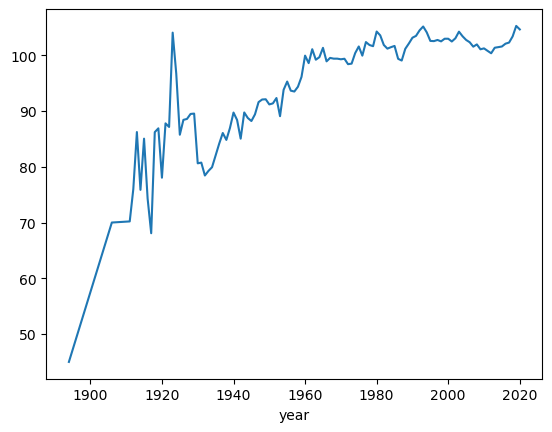

In [13]:
movies.select_dtypes(include='number').groupby('year').mean()['duration'].plot()

In [39]:
group_movies = movies.select_dtypes(include='number')
joined_group_movies = group_movies.join(movies['genre'])

In [40]:
joined_group_movies.head()

,year,duration,avg_vote,votes,metascore,reviews_from_users,reviews_from_critics,genre
imdb_title_id,,,,,,,,
tt0000009,1894,45,5.9,154,NaN,1.0,2.0,Romance
tt0000574,1906,70,6.1,589,NaN,7.0,7.0,"Biography, Crime, Drama"
tt0001892,1911,53,5.8,188,NaN,5.0,2.0,Drama
tt0002101,1912,100,5.2,446,NaN,25.0,3.0,"Drama, History"
tt0002130,1911,68,7.0,2237,NaN,31.0,14.0,"Adventure, Drama, Fantasy"


`explode()`: **It transform each element of a list-like to a row, replicating index values.**

In [44]:
joined_group_movies.explode('genre').groupby('genre').mean().sort_values('avg_vote',ascending=False).head(20)

,year,duration,avg_vote,votes,metascore,reviews_from_users,reviews_from_critics
genre,,,,,,,
"Musical, Comedy, Family",2001.000000,184.000000,8.700000,3560.0,NaN,11.000000,1.0
"Music, Musical",1974.000000,78.000000,8.500000,692.0,NaN,2.000000,NaN
"Family, Sci-Fi, Adventure",1991.000000,140.000000,8.400000,2223.0,NaN,3.000000,2.0
"Fantasy, Musical, Sci-Fi",2011.000000,172.000000,8.100000,626.0,NaN,1.000000,NaN
"Animation, Fantasy, Mystery",2012.000000,109.000000,8.000000,1203.0,NaN,2.000000,2.0
"Biography, History, Musical",1997.000000,150.000000,8.000000,1669.0,NaN,4.000000,NaN
"Fantasy, Musical, Mystery",1958.000000,110.000000,8.000000,1168.0,NaN,12.000000,5.0
"Fantasy, Drama, Romance",1950.000000,112.000000,8.000000,10117.0,NaN,58.000000,71.0
"Family, Musical, Comedy",1996.000000,105.000000,7.900000,388.0,NaN,2.000000,1.0


In [45]:
dataset = joined_group_movies.copy()
dataset['genre'] = dataset['genre'].str.split(',')

In [47]:
dataset = dataset.explode('genre')
dataset['genre'] = dataset['genre'].str.strip()

In [49]:
dataset.head(20)

,year,duration,avg_vote,votes,metascore,reviews_from_users,reviews_from_critics,genre
imdb_title_id,,,,,,,,
tt0000009,1894,45,5.9,154,NaN,1.0,2.0,Romance
tt0000574,1906,70,6.1,589,NaN,7.0,7.0,Biography
tt0000574,1906,70,6.1,589,NaN,7.0,7.0,Crime
tt0000574,1906,70,6.1,589,NaN,7.0,7.0,Drama
tt0001892,1911,53,5.8,188,NaN,5.0,2.0,Drama
tt0002101,1912,100,5.2,446,NaN,25.0,3.0,Drama
tt0002101,1912,100,5.2,446,NaN,25.0,3.0,History
tt0002130,1911,68,7.0,2237,NaN,31.0,14.0,Adventure
tt0002130,1911,68,7.0,2237,NaN,31.0,14.0,Drama


In [51]:
dataset.groupby('genre').mean().round(2).sort_values('avg_vote',ascending=False)

,year,duration,avg_vote,votes,metascore,reviews_from_users,reviews_from_critics
genre,,,,,,,
Documentary,2000.00,88.50,7.30,615.50,NaN,9.00,11.50
Film-Noir,1949.16,84.91,6.64,4225.92,85.85,43.10,22.13
Biography,1995.39,114.01,6.62,21785.73,61.81,82.59,55.30
History,1988.93,117.14,6.54,10485.19,62.67,51.37,32.22
War,1978.50,106.45,6.43,7809.11,62.86,39.80,21.81
News,2015.00,82.00,6.40,105.00,NaN,3.00,3.00
Animation,2003.11,87.40,6.38,22022.71,62.02,62.89,41.65
Musical,1972.16,109.18,6.25,3877.04,60.17,32.07,14.63
Music,1987.57,100.20,6.24,8982.58,57.66,48.44,31.75


<AxesSubplot:xlabel='year'>

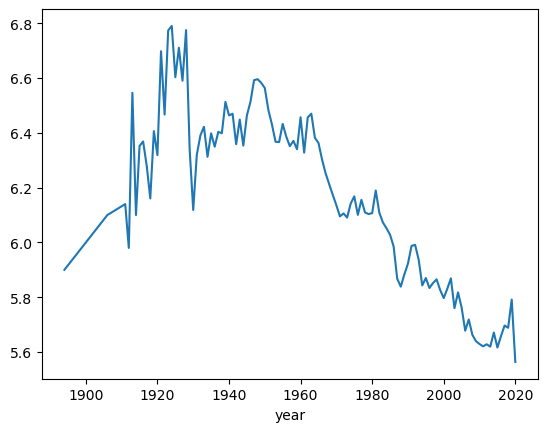

In [53]:
# average vote per year
joined_group_movies.select_dtypes(include='number').groupby('year').mean()['avg_vote'].plot()

<AxesSubplot:xlabel='year'>

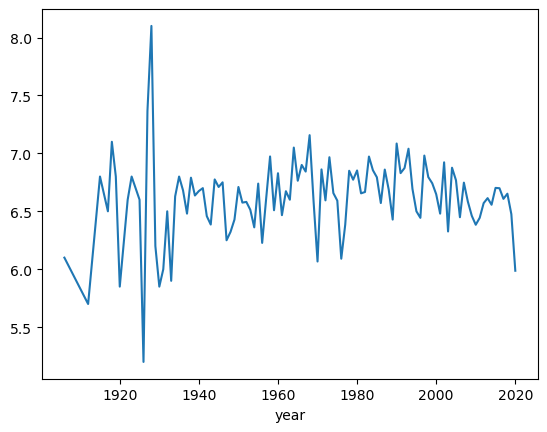

In [62]:
dataset[dataset['genre']=='Biography'].select_dtypes(include='number').groupby('year').mean()['avg_vote'].plot()

In [64]:
all_df = dataset.select_dtypes(include='number').groupby('year').mean()
bio_df = dataset[dataset['genre'] == "Biography"].select_dtypes(include='number').groupby('year').mean()

In [65]:
all_df.head(1)

,duration,avg_vote,votes,metascore,reviews_from_users,reviews_from_critics
year,,,,,,
1894,45.0,5.9,154.0,NaN,1.0,2.0


In [66]:
bio_df.head(1)

,duration,avg_vote,votes,metascore,reviews_from_users,reviews_from_critics
year,,,,,,
1906,70.0,6.1,589.0,NaN,7.0,7.0


In [67]:
x_all = pd.DataFrame(all_df.index)
y_all = all_df['avg_vote']

x_bio = pd.DataFrame(bio_df.index)
y_bio = bio_df['avg_vote']

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lin_all = LinearRegression()
lin_all.fit(x_all,y_all)

lin_bio = LinearRegression()
lin_bio.fit(x_bio,y_bio)

LinearRegression()

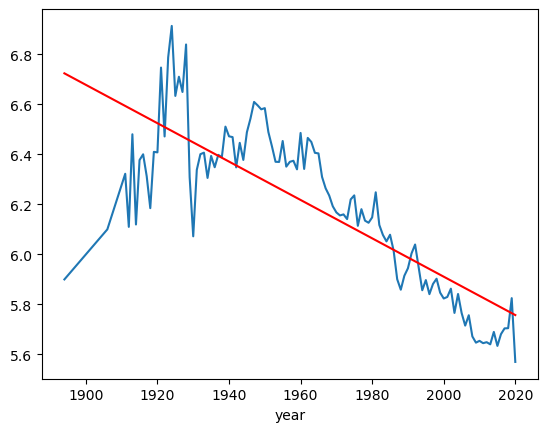

In [69]:
ax = all_df['avg_vote'].plot()
ax.plot(all_df.index, lin_all.predict(x_all), c='r')

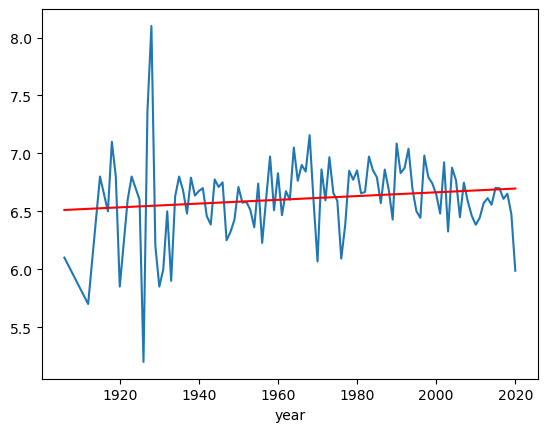

In [70]:
ax = bio_df['avg_vote'].plot()
ax.plot(bio_df.index, lin_bio.predict(x_bio), c='r')

### More movies are produced ==> Worse movies?

<AxesSubplot:xlabel='year'>

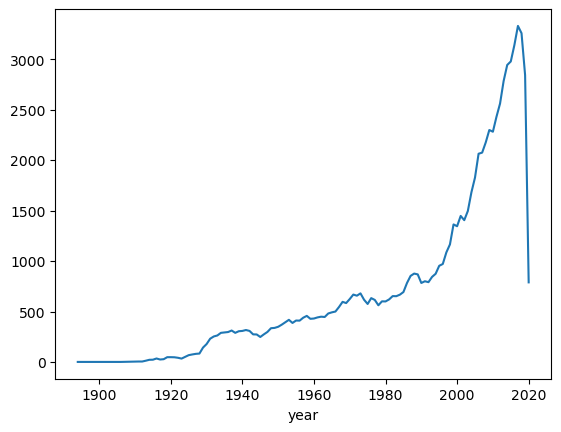

In [73]:
movies.groupby('year').count()['title'].plot()

### Votes per movies

In [75]:
movies['votes'].describe().round()

count      85855.0
mean        9493.0
std        53574.0
min           99.0
25%          205.0
50%          484.0
75%         1766.0
max      2278845.0
Name: votes, dtype: float64

<AxesSubplot:xlabel='year'>

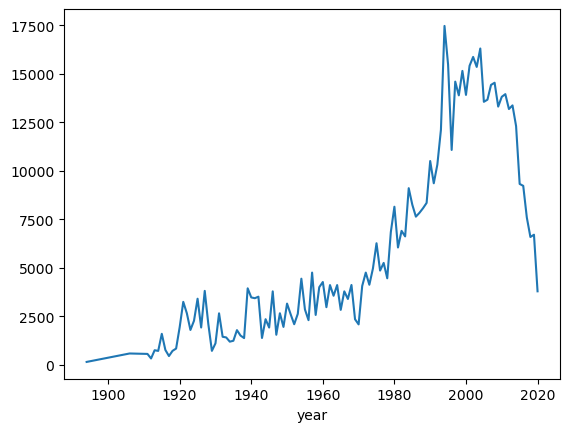

In [77]:
movies.select_dtypes(include='number').groupby('year').mean()['votes'].plot()

## Visualize

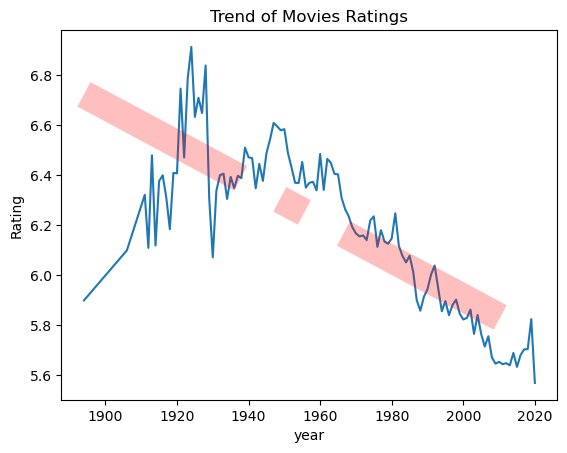

In [78]:
ax = all_df['avg_vote'].plot()
ax.plot(all_df.index, lin_all.predict(x_all), c='r', alpha=.25,linewidth=20, linestyle='-.')
ax.set_ylabel('Rating')
ax.set_title('Trend of Movies Ratings');

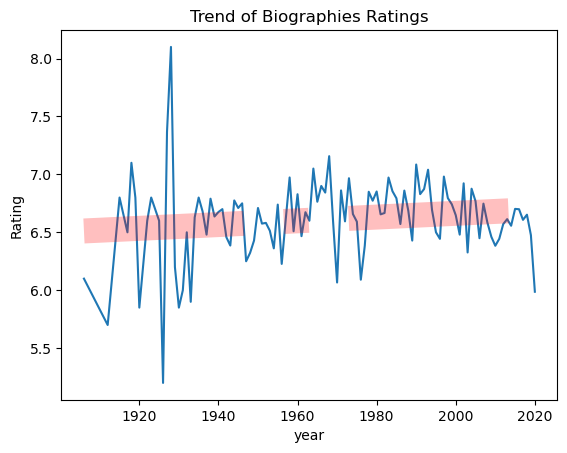

In [79]:
ax = bio_df['avg_vote'].plot()
ax.plot(bio_df.index, lin_bio.predict(x_bio), c='r', alpha=.25,linewidth=18,linestyle='-.')
ax.set_ylabel('Rating')
ax.set_title("Trend of Biographies Ratings");

### Credibility Counts
- This is the check point if your research is valid
    - Are you hiding findings you did not like (not supporting your hypothesis)?
    - Remember it is the long-term relationship that counts
- Don't leave out results
    - We learn from data and find hidden patterns, to make data-driven decisions, with a long-term perspective
    
**Movies are getting worse**
- But there are more movies
    - It can be made by anyone
    - Movies include at least 100 ratings

## Step 5: Action

<hr>

### Use Insights

**Insights**
- Movies get worse ratings
- Bias are getting better on average
- More movies are being produced
- More votes per movies

**Who are the end users**
- Is it an in-depth media or click-bolt media?


### Measure Impact
-  What chart are they most interested in?